# Converting Video to Frame

In [1]:
import cv2
import os
#Capturing Video
vidcap = cv2.VideoCapture(r"C:\Users\bibin\Documents\MLAI\Test2\KBFC1.mp4")
currentframe=0

#Creating Folder to save frames
if not os.path.exists('data'):
  os.makedirs('data')

#While loop 
while (True):
  sucess, frame = vidcap.read()
  cv2.imshow("Output",frame)
  cv2.imwrite('./data/frame' +str(currentframe)+'.jpg',frame)
  currentframe+=1
    
#Press Key"Q" to exit the loop
  if cv2.waitKey(1) & 0xFF == ord('q'):
    break
vidcap.release()
cv2.destroyAllWindows()

# Face Detection

In [2]:
import dlib
from PIL import Image
from skimage import io
import matplotlib.pyplot as plt
import sys
import glob
import cv2
import numpy as np

#Defining function to detect face in each frame
def detect_faces(image):

    # Create a face detector
    face_detector = dlib.get_frontal_face_detector()

    # Run detector and get bounding boxes of the faces on image.
    detected_faces = face_detector(image, 1)
    face_frames = [(x.left(), x.top(),
                    x.right(), x.bottom()) for x in detected_faces]

    return face_frames

#Folder to save detected faces
if not os.path.exists('data1'):
  os.makedirs('data1')

# Read the resized_image
cv_img = []
for img in glob.glob(r"C:\Users\bibin\Documents\MLAI\Test2\data\*.jpg"):
    n= cv2.imread(img,0)
    cv_img.append(n)
# Detect faces
count = 0
for image in cv_img:
    detected_faces = detect_faces(image)
    for n, face_rect in enumerate(detected_faces):
        face1 = Image.fromarray(image).crop(face_rect)
        face = np.array(face1)
        resized_image = cv2.resize(face, (48, 48))
        #print resized_image.shape
        #face_img = cv2.imwrite("hilary_face_images/face%d.jpg" % count, resized_image)
        cv2.imwrite('./data1/face_rect' + str(count)+'.jpg',resized_image)
        count += 1

# Creating Raw data of face detected

In [3]:
from PIL import Image
import numpy as np
import csv
import glob
import cv2
import pandas as pd 
import string
import pyexcel as pe
#np.set_printoptions(threshold='nan') 
# Read the image
cv_img = []
#Reading image from folder
for img in glob.glob(r"C:\Users\bibin\Documents\MLAI\Test2\data1\*.jpg"):
    im= cv2.imread(img,0)
    n = im.shape[0]
    m = im.shape[1]
    resized_image = cv2.resize(im, (n*m,1))
    #print resized_image.shape
    #resized_image = res_image.tolist()
    cv_img.append(np.array(resized_image).tolist())

In [4]:
#creating raw data to Dataframe
cv_img1=pd.DataFrame(cv_img)

In [5]:
#updating the column heading as 'pixels'
cv_img1.columns =['pixels']

In [6]:
cv_img1['pixels1'] = [','.join(map(str, l)) for l in cv_img1['pixels']]

In [7]:
cv_img1

,pixels,pixels1
0,"[70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 7...","70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,7..."
1,"[109, 109, 109, 109, 109, 109, 109, 109, 109, ...","109,109,109,109,109,109,109,109,109,109,109,10..."
2,"[121, 121, 121, 121, 121, 121, 121, 121, 121, ...","121,121,121,121,121,121,121,121,121,121,121,12..."
3,"[66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 6...","66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,6..."
4,"[68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 6...","68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,6..."
...,...,...
326,"[42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 4...","42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,4..."
327,"[38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 3...","38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,3..."
328,"[26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 2...","26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,2..."
329,"[46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 4...","46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,4..."


In [8]:
cv_img1['pixels']=cv_img1['pixels1'].str.replace(',',' ')

In [9]:
cv_img1

,pixels,pixels1
0,70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 7...,"70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,7..."
1,109 109 109 109 109 109 109 109 109 109 109 10...,"109,109,109,109,109,109,109,109,109,109,109,10..."
2,121 121 121 121 121 121 121 121 121 121 121 12...,"121,121,121,121,121,121,121,121,121,121,121,12..."
3,66 66 66 66 66 66 66 66 66 66 66 66 66 66 66 6...,"66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,6..."
4,68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 6...,"68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,6..."
...,...,...
326,42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 4...,"42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,4..."
327,38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 3...,"38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,3..."
328,26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 2...,"26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,2..."
329,46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 4...,"46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,4..."


In [10]:
#saving the data as a .csv file
cv_img1.to_csv('facedect.csv')

# Training System for Facial Expression Detection

In [11]:
import numpy as np
import pandas as pd
import math
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

import tensorflow as tf
from tensorflow.keras import optimizers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dropout, BatchNormalization, LeakyReLU, Activation
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [12]:
#Reading the 'facial-expression-recognitionferchallenge' dataset
df = pd.read_csv(r'C:\Users\bibin\Documents\MLAI\Test2\fer2013.csv')

In [13]:
#Checking the emtions in the dataset
df.emotion.unique()

array([0, 2, 4, 6, 3, 5, 1], dtype=int64)

In [14]:
#Checking the counts of each emotion
df.emotion.value_counts()

3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: emotion, dtype: int64

In [15]:
#removing the unwanted emotions
df=df[df['emotion']!=0 ]
df=df[df['emotion']!=1 ]
df=df[df['emotion']!=2 ]
df=df[df['emotion']!=6 ]

In [16]:
#Renaming Happy to Happy_Moments, Sad to Sad_Moments and Anciety to Goal_Moments
label_to_text = {3:'Happy_Moments', 4: 'Loss_Moments', 5:'Goal_Moments'}

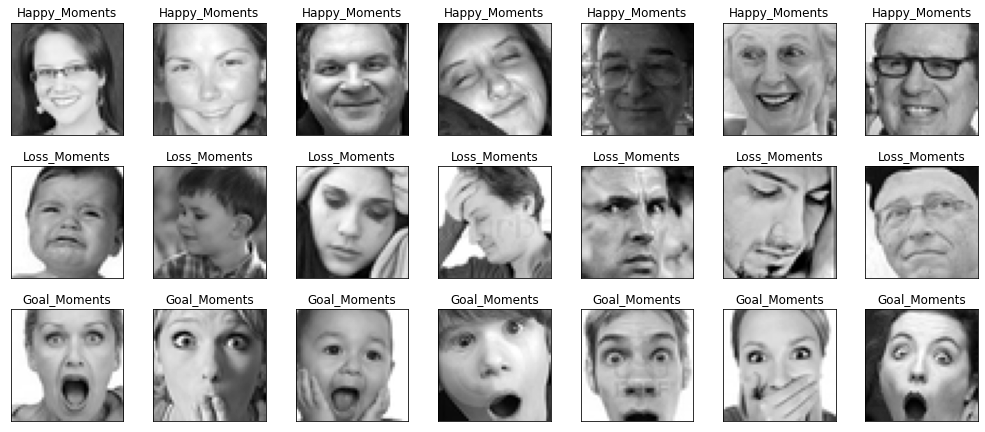

In [17]:
#Checking each emotions 
fig = pyplot.figure(1, (14, 14))

k = 0
for label in sorted(df.emotion.unique()):
    for j in range(7):
        px = df[df.emotion==label].pixels.iloc[k]
        px = np.array(px.split(' ')).reshape(48, 48).astype('float32')

        k += 1
        ax = pyplot.subplot(7, 7, k)
        ax.imshow(px, cmap='gray')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(label_to_text[label])
        pyplot.tight_layout()

#Spliting to training and testing dataset

In [18]:
#Setting the target feature
img_array = df.pixels.apply(lambda x: np.array(x.split(' ')).reshape(48, 48, 1).astype('float32'))
img_array = np.stack(img_array, axis=0)

In [19]:
#Label encoding and setting the output feature
from keras.utils import np_utils

le = LabelEncoder()
img_labels = le.fit_transform(df.emotion)
img_labels = np_utils.to_categorical(img_labels)
img_labels.shape

(19068, 3)

In [20]:
#spliting using train_test_split
X_train, X_test, y_train, y_test = train_test_split(img_array, img_labels,
                                                    shuffle=True, stratify=img_labels,
                                                    test_size=0.1, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((17161, 48, 48, 1), (1907, 48, 48, 1), (17161, 3), (1907, 3))

In [21]:
#Normalization of pixels from 0 to 1
X_train = X_train / 255.
X_test = X_test / 255.

In [22]:
#Image genaterator for training and testing dataset
train_datagen = ImageDataGenerator(horizontal_flip=True)
train_generator=train_datagen.flow(X_train,y_train,batch_size=64)
validation_datagen = ImageDataGenerator(horizontal_flip=True)
validation_generator=validation_datagen.flow(X_test,y_test,batch_size=64)

In [23]:
#Creating an LSTM model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(48,48,1), padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(128, (5,5), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(512, (3,3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(512, (3,3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Dense(3,activation='softmax'),

])


In [24]:
#compiling the model
model.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(lr=0.0005), metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       204928    
                                                                 
 batch_normalization_1 (Batc  (None, 24, 24, 128)      5

In [25]:
#Fitting the model and saving the model as ,h5 file 
checkpoint = ModelCheckpoint("model_weights.h5", monitor='val_accuracy',
                             save_weights_only=True, mode='max', verbose=1)
callbacks = [checkpoint]



history = model.fit(
    x=train_generator,
    validation_data=validation_generator,
    steps_per_epoch=len(X_train) / 64,
    epochs=10,
    callbacks=callbacks
)

Epoch 1/10
269/268 [==============================] - ETA: -1s - loss: 1.0429 - accuracy: 0.5441
Epoch 1: saving model to model_weights.h5
268/268 [==============================] - 489s 2s/step - loss: 1.0429 - accuracy: 0.5441 - val_loss: 2.0428 - val_accuracy: 0.4714
Epoch 2/10
269/268 [==============================] - ETA: -1s - loss: 0.6557 - accuracy: 0.7248
Epoch 2: saving model to model_weights.h5
268/268 [==============================] - 468s 2s/step - loss: 0.6557 - accuracy: 0.7248 - val_loss: 0.9701 - val_accuracy: 0.5915
Epoch 3/10
269/268 [==============================] - ETA: -1s - loss: 0.5191 - accuracy: 0.7916
Epoch 3: saving model to model_weights.h5
268/268 [==============================] - 396s 1s/step - loss: 0.5191 - accuracy: 0.7916 - val_loss: 0.6909 - val_accuracy: 0.7195
Epoch 4/10
269/268 [==============================] - ETA: -1s - loss: 0.4569 - accuracy: 0.8216
Epoch 4: saving model to model_weights.h5
268/268 [==============================] - 453s 

In [26]:
#Saving the model as json file
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

In [27]:
#Saving the entire trained model
model.save('lstm_face_dectect_model.h5')

# Applying the model on our detected faces

In [28]:
#Reading saved raw dataset of detected faces
df_football = pd.read_csv(r'C:\Users\bibin\Documents\MLAI\Test2\facedect.csv')

In [29]:
# Creating the target variable in raw dataset
img_array_football = df_football.pixels.apply(lambda x: np.array(x.split(' ')).reshape(48, 48, 1).astype('float32'))
img_array_football = np.stack(img_array_football, axis=0)

In [30]:
#Normalizing raw data
X = img_array_football / 255.

In [31]:
# Calling the saved LSTM model and make predictions of each face
from keras.models import load_model
model = load_model('lstm_face_dectect_model.h5')
# make predictions
output = model.predict(X, verbose=0)

In [32]:
output=pd.DataFrame(output)

In [33]:
output

,0,1,2
0,0.041337,0.935199,0.023464
1,0.387058,0.448950,0.163992
2,0.416241,0.517734,0.066025
3,0.234204,0.732270,0.033526
4,0.395542,0.576896,0.027562
...,...,...,...
326,0.843796,0.123312,0.032891
327,0.150703,0.784668,0.064628
328,0.167099,0.808881,0.024020
329,0.304892,0.594648,0.100460


In [34]:
#Naming each column based on the labels given
output.columns =['Happy_Moments', 'Loss_Moments', 'Goal_Moments']

In [35]:
#output = output[["Happy_Moments", "Loss_Moments", "Goal_Moments"]].max(axis=1)

In [36]:
#Taking the maximum value by comparing the 3 columns
result = output.idxmax(axis=1)

In [37]:
result

0       Loss_Moments
1       Loss_Moments
2       Loss_Moments
3       Loss_Moments
4       Loss_Moments
           ...      
326    Happy_Moments
327     Loss_Moments
328     Loss_Moments
329     Loss_Moments
330     Loss_Moments
Length: 331, dtype: object

In [38]:
#Naming Column name as 'emotion'
result.columns =['emotion']

# Checking the most repeated value: Which is the Sentiment of the Video

In [39]:
#Checking the most repeated value: ##Which is the Sentiment of the Video
result.value_counts()

Loss_Moments     212
Happy_Moments    119
dtype: int64